<h1 style="text-align:center;font-size:30px;" > CNN on MNIST using Keras </h1>

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


import warnings
warnings.filterwarnings("ignore")
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
import seaborn as sns
from keras.initializers import RandomNormal
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time 
from keras.layers import Activation
from datetime import datetime
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

Using TensorFlow backend.


## 1.0 Loading & splitting the data

In [3]:
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
print(input_shape)

(28, 28, 1)


## 2.0 Utility functions

In [0]:
batch_size = 150
num_classes = 10
epochs = 15

In [0]:
# function to plot epoch vs loss

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## 3.0 Three layered CNN using 3X3 kernel

In [0]:
import warnings
warnings.filterwarnings("ignore")

start = datetime.now()

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid', kernel_initializer= 'he_normal',
                 activation='relu',input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(90, (3, 3), activation='relu', kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer= 'he_normal'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

fit1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print('Time taken :', datetime.now() - start)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/15





60000/60000 [==============================] - 167s 3ms/step - loss: 0.3381 - acc: 0.8939 - val_loss: 0.0503 - val_acc: 0.9845
Epoch 2/15
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0960 - acc: 0.9716 - val_loss: 0.0341 - val_acc: 0.9888
Epoch 3/15
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0709 - acc: 0.9794 - val_loss: 0.0278 - val_acc: 0.9897
Epoch 4/15
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0604 - acc: 0.9828 - val_loss: 0.0230 - val_acc: 0.9921
Epoch 5/15
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0525 - acc: 0.9839 - val_loss: 0.0216 - val_acc: 0.9936
Epoch 6/15
60000/60000 [===========

### 3.1 Results & Plot

Test score: 0.019186536238695043
Test accuracy: 0.9941


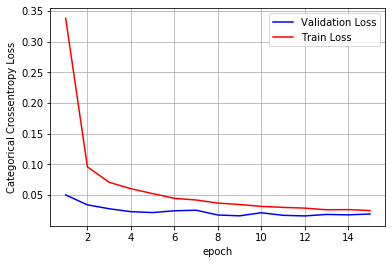

In [0]:
score1 = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score1[0]) 
print('Test accuracy:', score1[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = fit1.history['val_loss']
ty = fit1.history['loss']
plt_dynamic(x, vy, ty, ax)

## 4.0 Five layered CNN using 2X2 kernel with batch normalization & dropout

In [0]:
batch_size = 200
num_classes = 10
epochs = 10

In [30]:
import warnings
warnings.filterwarnings("ignore")

start = datetime.now()

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), strides=(1, 1), padding='same', kernel_initializer= 'he_normal',
                 activation='relu',input_shape=input_shape))

model.add(Conv2D(64, (2, 2), strides=(1, 1),padding='same',activation='relu', kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(80, (2, 2), strides=(1, 1), padding='same', activation='relu', kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(100, (2, 2), strides=(1, 1), padding='same', activation='relu', kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(120, (2, 2), strides=(1, 1), padding='same', activation='relu', kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer= 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

fit2=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print('Time taken :', datetime.now() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.5747 - acc: 0.8229 - val_loss: 0.1548 - val_acc: 0.9518
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.2103 - acc: 0.9351 - val_loss: 0.1090 - val_acc: 0.9648
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1586 - acc: 0.9506 - val_loss: 0.0845 - val_acc: 0.9723
Epoch 4/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1342 - acc: 0.9588 - val_loss: 0.0839 - val_acc: 0.9729
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1157 - acc: 0.9641 - val_loss: 0.0677 - val_acc: 0.9771
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1039 - acc: 0.9682 - val_loss: 0.0637 - val_acc: 0.9784
Epoch 7/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0949 - acc: 0.9706 - val_loss: 0.0556 - 

### 4.1 Results & Plot

Test score: 0.049710892591020094
Test accuracy: 0.9844


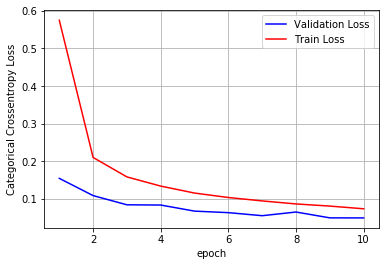

In [31]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# plot
vy = fit2.history['val_loss']
ty = fit2.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5.0 Seven layered CNN using 5X5 kernel with batch normalization & dropout

In [0]:
batch_size = 200
num_classes = 10
epochs = 10

In [25]:
import warnings
warnings.filterwarnings("ignore")

start = datetime.now()

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), strides=(2, 2), padding='same', kernel_initializer= 'he_normal',
                 activation='relu',input_shape=input_shape))

model.add(Conv2D(64, (5, 5), strides=(2, 2),padding='same', activation='relu', kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(80, (5, 5), strides=(2, 2),padding='same', activation='relu', kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(100, (5, 5), strides=(2, 2), padding='same', activation='relu', kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(120, (5, 5), strides=(2, 2), padding='same', activation='relu', kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(150, (5, 5), strides=(2, 2), padding='same', activation='relu', kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(170, (5, 5), strides=(2, 2),padding='same', activation='relu', kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(150, activation='relu',kernel_initializer= 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

fit3=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print('Time taken :', datetime.now() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 248s 4ms/step - loss: 0.7999 - acc: 0.7518 - val_loss: 0.1932 - val_acc: 0.9486
Epoch 2/10
60000/60000 [==============================] - 242s 4ms/step - loss: 0.2528 - acc: 0.9306 - val_loss: 0.1432 - val_acc: 0.9610
Epoch 3/10
60000/60000 [==============================] - 243s 4ms/step - loss: 0.1875 - acc: 0.9498 - val_loss: 0.1082 - val_acc: 0.9714
Epoch 4/10
60000/60000 [==============================] - 243s 4ms/step - loss: 0.1484 - acc: 0.9595 - val_loss: 0.0950 - val_acc: 0.9734
Epoch 5/10
60000/60000 [==============================] - 243s 4ms/step - loss: 0.1280 - acc: 0.9654 - val_loss: 0.0799 - val_acc: 0.9763
Epoch 6/10
60000/60000 [==============================] - 243s 4ms/step - loss: 0.1115 - acc: 0.9697 - val_loss: 0.0795 - val_acc: 0.9772
Epoch 7/10
60000/60000 [==============================] - 242s 4ms/step - loss: 0.1061 - acc: 0.9712 - val_loss: 0.0786 - 

### 5.1 Results & Plot

Test score: 0.07328068963296246
Test accuracy: 0.9788


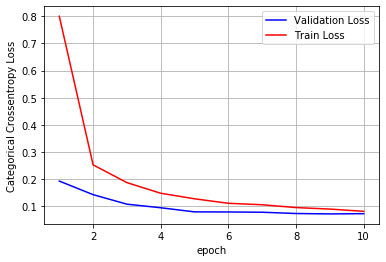

In [26]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# plot
vy = fit3.history['val_loss']
ty = fit3.history['loss']
plt_dynamic(x, vy, ty, ax)

## 6.0 Summary

In [38]:
import pandas as pd

df= pd.DataFrame(columns=["Number of Layers","Kernel size","Strides","Pooling window size","Batch size","Epoch","Test Loss","Test Accuracy"],index=['I','II','III'])
df.loc['I']=[3,('3X3'),(1,1), (2,2),150,15, 0.0192, '99.41%']
df.loc['II']=[5,('2X2'),(1,1), (1,1),200,10, 0.0497, '98.44%']
df.loc['III']=[7,('5X5'),(2,2), (1,1),200,10, 0.0733, '97.88%']
df

,Number of Layers,Kernel size,Strides,Pooling window size,Batch size,Epoch,Test Loss,Test Accuracy
I,3,3X3,"(1, 1)","(2, 2)",150,15,0.0192,99.41%
II,5,2X2,"(1, 1)","(1, 1)",200,10,0.0497,98.44%
III,7,5X5,"(2, 2)","(1, 1)",200,10,0.0733,97.88%
